<a href="https://colab.research.google.com/github/lmassaron/ml4dummies_3ed/blob/main/ML4D3E_12_working_with_linear_models_the_easy_way.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target.values

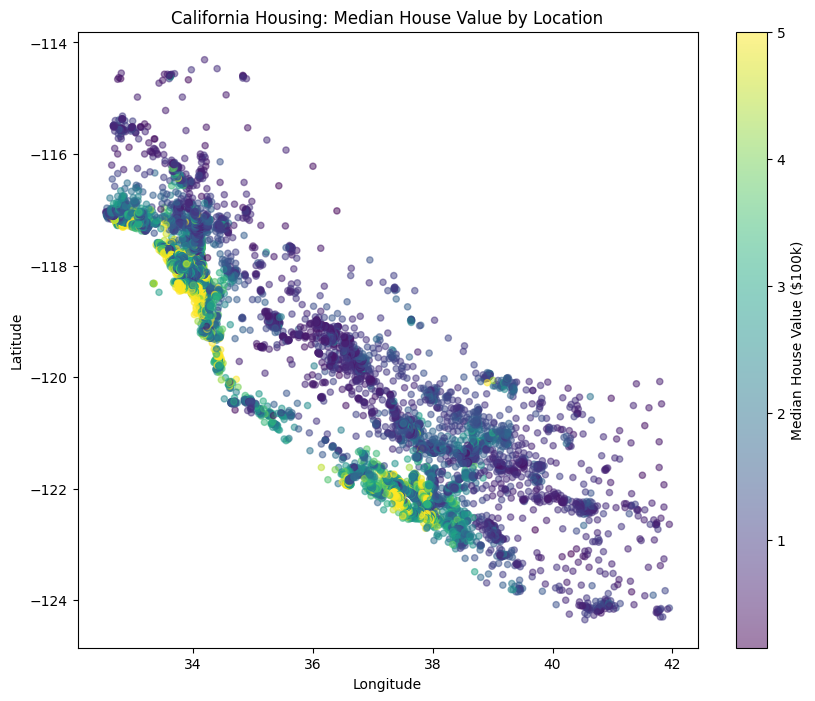

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X["Latitude"], X["Longitude"], c=y, cmap='viridis', alpha=0.5, s=20)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("California Housing: Median House Value by Location")
plt.colorbar(scatter, label="Median House Value ($100k)")
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                  shuffle=True, test_size=0.2, random_state=11)

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

lm = Pipeline([
    ("scaler", StandardScaler()),
    ("regression", LinearRegression())
])

lm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regression', LinearRegression())])

In [5]:
print(f"R2 on train: {lm.score(X_train, y_train):0.3f}")
print(f"R2 on test: {lm.score(X_test, y_test):0.3f}")

R2 on train: 0.606
R2 on test: 0.606


In [6]:
import numpy as np

mean_y = np.mean(y_train)
squared_errors_mean = np.sum((y_train - mean_y)**2)
squared_errors_model = np.sum((y_train -
                           lm.predict(X_train))**2)
R2 = 1 - (squared_errors_model / squared_errors_mean)

print (f"Computed R2: {R2}")

Computed R2: 0.6061334059992143


In [7]:
print([f"{feat} : {coef:0.2f}" for feat, coef in
       zip(X.columns, lm["regression"].coef_)])

['MedInc : 0.82', 'HouseAge : 0.12', 'AveRooms : -0.26', 'AveBedrms : 0.31', 'Population : -0.01', 'AveOccup : -0.04', 'Latitude : -0.91', 'Longitude : -0.88']


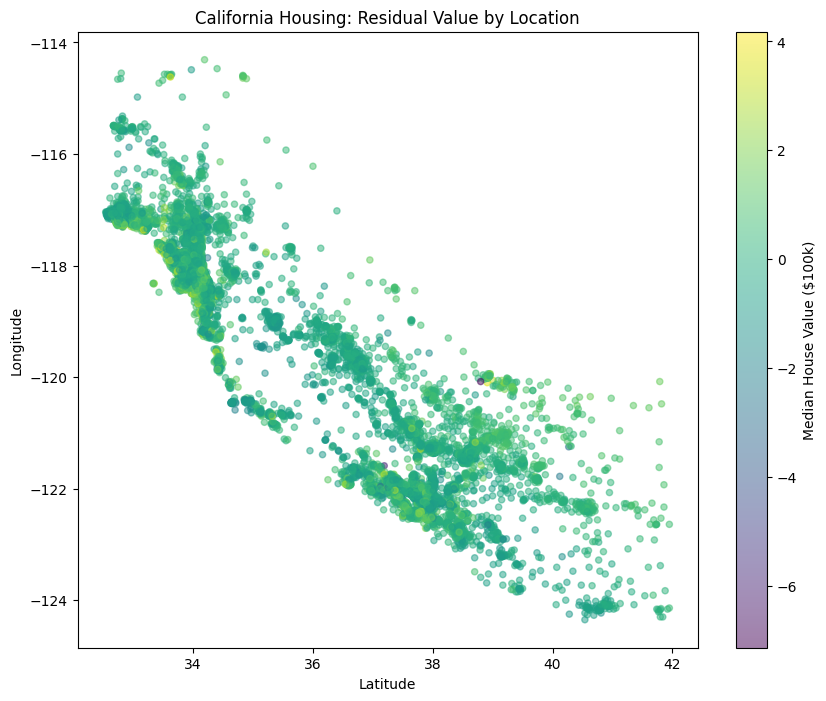

In [8]:
import matplotlib.pyplot as plt

residuals = y_train - lm.predict(X_train)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train["Latitude"], X_train["Longitude"], c=residuals, cmap="viridis", alpha=0.5, s=20)

plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("California Housing: Residual Value by Location")
plt.colorbar(scatter, label="Median House Value ($100k)")
plt.show()

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()
enc = OneHotEncoder(sparse_output=False)
qualitative = ["red", "red", "green", "blue",
               "red", "blue", "blue", "green"]

labels = lbl.fit_transform(qualitative).reshape(-1, 1)

print(enc.fit_transform(labels))

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [10]:
from sklearn.preprocessing import PolynomialFeatures

lm = Pipeline([
    ("scaler", StandardScaler()),
    ("polynomial", PolynomialFeatures(degree=2)),
    ("regression", LinearRegression())
])

lm.fit(X_train, y_train)
r2 = lm.score(X_train, y_train)

print(f"train R2: {r2:0.3}")

train R2: 0.69


In [11]:
r2 = lm.score(X_test, y_test)
print(f"test R2: {r2:0.3}")

test R2: 0.423


In [12]:
from sklearn.linear_model import LinearRegression
import numpy as np

target = np.array([0, 0, 0, 0, 1, 1, 1, 1])
data = np.array([1, 2, 3, 4, 5, 6, 7, 8]).reshape(8,1)

lm = LinearRegression()
lm.fit(data, target)
preds = lm.predict(data)

for y_true, y_pred in zip(target, preds):
    print(f"{y_true} -> {y_pred:+0.3}")

0 -> -0.167
0 -> +0.0238
0 -> +0.214
0 -> +0.405
1 -> +0.595
1 -> +0.786
1 -> +0.976
1 -> +1.17


In [13]:
from sklearn.linear_model import LogisticRegression

lr = Pipeline([
    ("scaler", StandardScaler()),
    ("logistic", LogisticRegression())
])

topQ_train = y_train >= np.percentile(y_train, 75)
topQ_test = y_test >= np.percentile(y_train, 75)
lr.fit(X_train, topQ_train)

from sklearn.metrics import accuracy_score
in_sample_acc = accuracy_score(topQ_train,
                               lr.predict(X_train))
out_sample_acc = accuracy_score(topQ_test,
                                lr.predict(X_test))

print(f'In-sample accuracy: {in_sample_acc:0.3}')
print(f'Out-of-sample accuracy: {out_sample_acc:0.3}')


In-sample accuracy: 0.871
Out-of-sample accuracy: 0.863


In [14]:
for var, coef in zip(X.columns, lr["logistic"].coef_[0]):
    print(f"{var:7} : {coef:+0.3}")

MedInc  : +2.28
HouseAge : +0.443
AveRooms : -0.705
AveBedrms : +0.904
Population : +0.0714
AveOccup : -5.12
Latitude : -3.8
Longitude : -3.54


In [15]:
print('classes:',lr.classes_)
print('\nProbs:\n',lr.predict_proba(X_test)[:3,:])

classes: [False  True]

Probs:
 [[0.99200156 0.00799844]
 [0.85857244 0.14142756]
 [0.78629948 0.21370052]]


In [16]:
r2_train = list()
r2_test = list()

np.random.seed(42)
X_train_extra = X_train.copy()
X_test_extra = X_test.copy()

for i in range(1, 50):

  X_train_extra[f"rand_{i}"] = X_train["MedInc"].sample(frac=1.).values
  X_test_extra[f"rand_{i}"] = X_test["MedInc"].sample(frac=1.).values

  lm = Pipeline([
    ("scaler", StandardScaler()),
    ("regression", LinearRegression())
  ])

  lm.fit(X_train_extra, y_train)
  r2_train.append(lm.score(X_train_extra, y_train))
  r2_test.append(lm.score(X_test_extra, y_test))

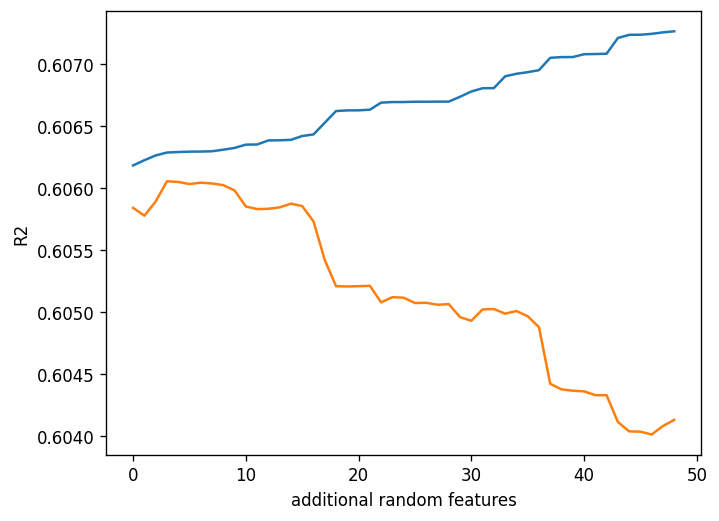

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=120)
plt.plot(r2_train, label='train')
plt.plot(r2_test, label='test')
plt.xlabel("additional random features")
plt.ylabel("R2")
plt.show()

In [18]:
features = ["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup"]

for f1 in features:
  for f2 in features:
    if f1 != f2:
      X_train[f"{f1}_{f2}"] = X_train[f1] * X_train[f2]
      X_test[f"{f1}_{f2}"] = X_test[f1] * X_test[f2]

In [19]:
lm.fit(X_train, y_train)

r2_train = lm.score(X_train, y_train)
print(f"R2 train: {r2_train:0.3}")

r2_test = lm.score(X_test, y_test)
print(f"R2 test: {r2_test:0.3}")

R2 train: 0.635
R2 test: 0.562


In [20]:
from sklearn.feature_selection import SequentialFeatureSelector

lm = Pipeline([
  ("scaler", StandardScaler()),
  ("regression", LinearRegression())
])

selector = SequentialFeatureSelector(estimator=lm, direction='forward', cv=5, scoring="r2")
selector.fit(X_train, y_train)

n_features = selector.n_features_to_select_
selection = X_train.columns[selector.support_].tolist()
print(f"Features reduced from {X_train.shape[1]} to {n_features}")
print(selection)

Features reduced from 38 to 19
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedInc_HouseAge', 'MedInc_AveRooms', 'MedInc_Population', 'HouseAge_MedInc', 'HouseAge_AveRooms', 'HouseAge_AveBedrms', 'AveRooms_MedInc', 'AveRooms_HouseAge', 'AveRooms_Population', 'AveBedrms_Population', 'Population_AveRooms']


In [21]:
lm.fit(X_train[selection], y_train)

r2_train = lm.score(X_train[selection], y_train)
print(f"R2 train: {r2_train:0.3}")

r2_test = lm.score(X_test[selection], y_test)
print(f"R2 test: {r2_test:0.3}")

R2 train: 0.623
R2 test: 0.621


In [22]:
from sklearn.linear_model import RidgeCV

ridge = Pipeline([
  ("scaler", StandardScaler()),
  ("regression", RidgeCV(alphas=[0.1, 1, 10, 50, 70, 100, 300, 500, 1000],
                cv=5, scoring='r2'))
])

ridge.fit(X_train, y_train)

best_alpha = ridge["regression"].alpha_
r2_test = ridge.score(X_test, y_test)

print(f"best alpha is: {best_alpha}")
print(f"test R2: {r2_test:0.3}")

best alpha is: 500.0
test R2: 0.612


In [23]:
for var, coef in zip(X_train.columns, ridge["regression"].coef_):
    print(f"{var:7} : {coef:+0.3}")

MedInc  : +0.478
HouseAge : +0.0132
AveRooms : +0.0255
AveBedrms : +0.0412
Population : -0.139
AveOccup : -0.122
Latitude : -0.614
Longitude : -0.59
MedInc_HouseAge : +0.147
MedInc_AveRooms : -0.024
MedInc_AveBedrms : +0.0615
MedInc_Population : +0.139
MedInc_AveOccup : -0.0193
HouseAge_MedInc : +0.147
HouseAge_AveRooms : -0.12
HouseAge_AveBedrms : +0.0823
HouseAge_Population : +0.00408
HouseAge_AveOccup : -0.0602
AveRooms_MedInc : -0.024
AveRooms_HouseAge : -0.12
AveRooms_AveBedrms : -0.0168
AveRooms_Population : -0.163
AveRooms_AveOccup : +0.042
AveBedrms_MedInc : +0.0615
AveBedrms_HouseAge : +0.0823
AveBedrms_AveRooms : -0.0168
AveBedrms_Population : +0.107
AveBedrms_AveOccup : -0.0313
Population_MedInc : +0.139
Population_HouseAge : +0.00408
Population_AveRooms : -0.163
Population_AveBedrms : +0.107
Population_AveOccup : +0.106
AveOccup_MedInc : -0.0193
AveOccup_HouseAge : -0.0602
AveOccup_AveRooms : +0.042
AveOccup_AveBedrms : -0.0313
AveOccup_Population : +0.106


In [24]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score

lasso = Pipeline([
  ("scaler", StandardScaler()),
  ("regression", LassoCV(n_alphas=300,
                 max_iter=10_000, cv=5))
])
lasso.fit(X_train, y_train)

best_alpha = lasso["regression"].alpha_
r2_test = lasso.score(X_test, y_test)

print(f"best alpha is: {best_alpha:0.5f}")
print(f"test R2: {r2_test:0.3}")

best alpha is: 0.00579
test R2: 0.609


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

SGD = SGDRegressor(penalty="l2",
                   alpha=0.00001,
                   learning_rate="adaptive",
                   eta0=0.00004,
                   random_state=0)
r2_train = list()
r2_test = list()
iterations = 37
np.random.seed(0)

for i in range(iterations):
    n = np.random.permutation(len(scaled_X_train))
    for j in n:
        SGD.partial_fit(scaled_X_train[[j], :], y_train[[j]])

    r2_train.append(SGD.score(scaled_X_train, y_train))
    r2_test.append(SGD.score(scaled_X_test, y_test))

print(f"Last R2 score on train: {r2_train[-1]:0.3}")
print(f"Last R2 score on test: {r2_test[-1]:0.3}")

Last R2 score on train: 0.597
Last R2 score on test: 0.616


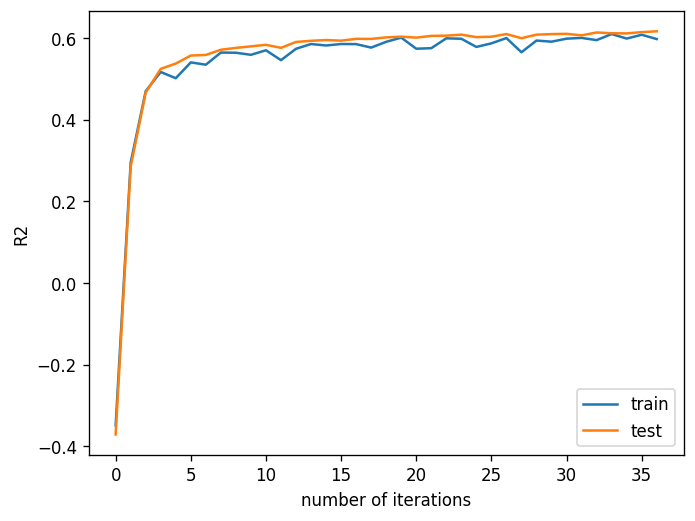

In [26]:
fig, ax = plt.subplots(dpi=120)
plt.plot(r2_train, label="train")
plt.plot(r2_test, label="test")
plt.xlabel("number of iterations")
plt.ylabel("R2")
plt.legend()
plt.show()